# Proyecto: Análisis de Comportamiento de Usuarios

Este notebook realiza los siguientes pasos:

1. Carga y exploración del dataset
2. División en conjuntos de entrenamiento, validación y prueba
3. Entrenamiento y ajuste de hiperparámetros de un modelo (Random Forest)
4. Evaluación del modelo en el conjunto de validación y prueba
5. Prueba de cordura del modelo

El dataset (`users_behavior.csv`) contiene la siguiente información para cada usuario:
- `calls`: número de llamadas
- `minutes`: duración total de llamadas en minutos
- `messages`: número de mensajes de texto
- `mb_used`: tráfico de Internet utilizado en MB
- `is_ultra`: plan del mes actual (Ultra - 1, Smart - 0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset
data = pd.read_csv("/Users/juanvielmapereyra/NOTEBOOKS/Modelo_Machine_Learning_Sprint9/users_behavior.csv")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas:")
print(data.describe())

# Información general del dataset
print("Información del dataset:")
print(data.info())

Primeras filas del dataset:
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
Estadísticas descriptivas:
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000
Informaci

## División del Conjunto de Datos

Separamos las características (`calls`, `minutes`, `messages`, `mb_used`) de la variable objetivo (`is_ultra`) y dividimos el dataset en entrenamiento (60%), validación (20%) y prueba (20%).

In [2]:
# Separar características y variable objetivo
X = data[['calls', 'minutes', 'messages', 'mb_used']]
y = data['is_ultra']

# Primera división: entrenamiento (60%) y conjunto temporal (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Segunda división: el conjunto temporal se divide en validación (20%) y prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1928, 4)
Tamaño del conjunto de validación: (643, 4)
Tamaño del conjunto de prueba: (643, 4)


## Entrenamiento y Ajuste de Hiperparámetros

Utilizaremos un **Random Forest** y `GridSearchCV` para encontrar la mejor combinación de hiperparámetros.

In [3]:
# Definir el clasificador y la grilla de hiperparámetros
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_rf.best_estimator_
print("Mejores hiperparámetros:", grid_rf.best_params_)

# Evaluar en el conjunto de validación
y_val_pred = best_rf.predict(X_val)
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred))

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy en validación: 0.8055987558320373
Reporte de clasificación en validación:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       446
           1       0.76      0.53      0.63       197

    accuracy                           0.81       643
   macro avg       0.79      0.73      0.75       643
weighted avg       0.80      0.81      0.79       643



## Evaluación Final en el Conjunto de Prueba

Una vez seleccionado el mejor modelo basado en el conjunto de validación, se evalúa su desempeño final en el conjunto de prueba.

In [4]:
# Evaluación final en el conjunto de prueba
y_test_pred = best_rf.predict(X_test)
print("Accuracy en prueba:", accuracy_score(y_test, y_test_pred))
print("Reporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

Accuracy en prueba: 0.8164852255054432
Reporte de clasificación en prueba:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       448
           1       0.75      0.58      0.66       195

    accuracy                           0.82       643
   macro avg       0.80      0.75      0.77       643
weighted avg       0.81      0.82      0.81       643



## Prueba de Cordura

Para verificar que el modelo tiene un comportamiento razonable, examinamos la distribución de las predicciones en el conjunto de prueba.

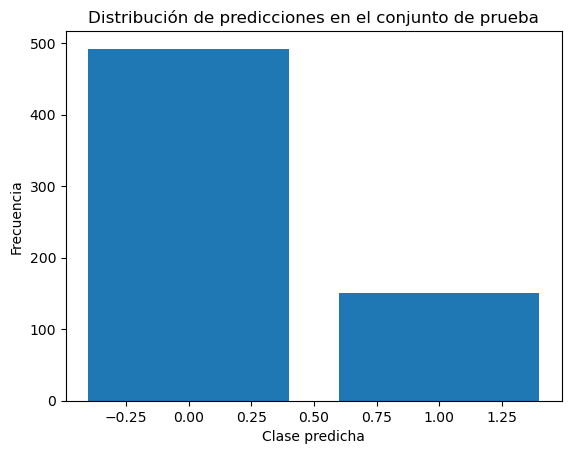

In [5]:
# Verificar la distribución de predicciones
unique, counts = np.unique(y_test_pred, return_counts=True)
plt.figure()
plt.bar(unique, counts)
plt.xlabel("Clase predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de predicciones en el conjunto de prueba")
plt.show()

## Conclusiones

En este notebook se ha:

- Explorado y analizado el dataset
- Dividido los datos en entrenamiento, validación y prueba
- Ajustado un modelo de Random Forest mediante GridSearchCV
- Evaluado el modelo en conjuntos de validación y prueba
    - Se han analizado métricas como la precisión, recall y F1-score
- Realizado una prueba de cordura para verificar la distribución de las predicciones

Estos pasos permiten obtener un modelo robusto y validar que se comporta de manera coherente con los datos y la problemática planteada.